# **Submission 03 - Animals - Image Classification (TFLite)**

**Nur Imam Masri**

**Email : nurimammasri.01@gmail.com**

**Username : imammasri**

***Submission Machine Learning Pemula Dicoding***

In [ ]:
# import library
import numpy as np
import os
import zipfile
import shutil

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Download dataset from Kaggle**

In [ ]:
# install kaggle package
!pip install -q kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurimammasri","key":"c1155f6163293daec115b33a4ba22c8b"}'}

In [ ]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
# test kaggle dataset list
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-11 07:33:11           2485  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1445  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1064  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            246  
imsparsh/musicnet-dataset                                   MusicNet Dataset

In [ ]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d madisona/translated-animals10

100% 585M/586M [00:16<00:00, 35.9MB/s]
100% 586M/586M [00:16<00:00, 37.9MB/s]


In [ ]:
# unzip
!mkdir animals
!unzip -q translated-animals10.zip -d animals
!ls animals

animals10


In [ ]:
listdir_image = os.listdir('animals/animals10/raw-img')
print(listdir_image)

['sheep', 'horse', 'cat', 'squirrel', 'spider', 'butterfly', 'elephant', 'cow', 'dog', 'chicken']


In [ ]:
# check a lot of data for paper, rock and scissors
dir_image = 'animals/animals10/raw-img'

for  item in listdir_image:
  class_dir = os.path.join(dir_image,item)
  print(item ," : ",len(os.listdir(class_dir)))

sheep  :  1820
horse  :  2623
cat  :  1668
squirrel  :  1862
spider  :  4821
butterfly  :  2112
elephant  :  1446
cow  :  1866
dog  :  4863
chicken  :  3098


In [ ]:
# check image on paper, rock, scissors
from PIL import Image
total = 0

for x in listdir_image:
  dir = os.path.join(dir_image, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  size = (0,0)
  img_name = os.listdir(dir)
  for i in range(5):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)
    
    if size == img.size:
      continue
    else :
      size = img.size
      print('+ size = ',img.size)

print('\nTotal :', total)

sheep: 1820
+ size =  (300, 180)
+ size =  (300, 225)
+ size =  (300, 200)
+ size =  (300, 225)
+ size =  (300, 200)
horse: 2623
+ size =  (300, 292)
+ size =  (300, 213)
+ size =  (149, 300)
+ size =  (300, 204)
+ size =  (300, 206)
cat: 1668
+ size =  (262, 300)
+ size =  (640, 425)
+ size =  (300, 229)
+ size =  (640, 426)
+ size =  (640, 394)
squirrel: 1862
+ size =  (300, 220)
+ size =  (300, 200)
+ size =  (300, 226)
+ size =  (300, 202)
+ size =  (200, 300)
spider: 4821
+ size =  (271, 300)
+ size =  (202, 300)
+ size =  (259, 300)
+ size =  (300, 200)
+ size =  (300, 225)
butterfly: 2112
+ size =  (300, 300)
+ size =  (200, 300)
+ size =  (300, 200)
+ size =  (300, 225)
+ size =  (300, 200)
elephant: 1446
+ size =  (640, 360)
+ size =  (200, 300)
+ size =  (640, 360)
+ size =  (300, 183)
+ size =  (640, 425)
cow: 1866
+ size =  (300, 225)
+ size =  (300, 213)
+ size =  (300, 211)
+ size =  (300, 225)
dog: 4863
+ size =  (254, 300)
+ size =  (300, 225)
+ size =  (203, 300)
+ siz

sheep


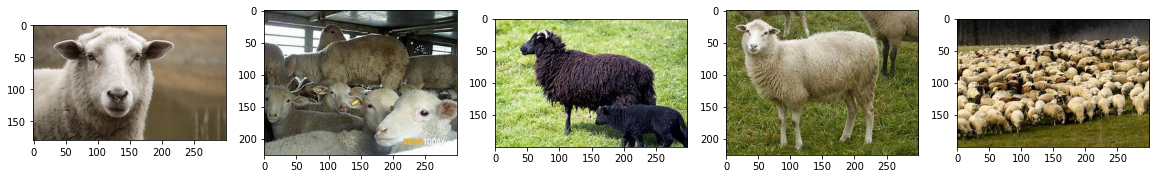

horse


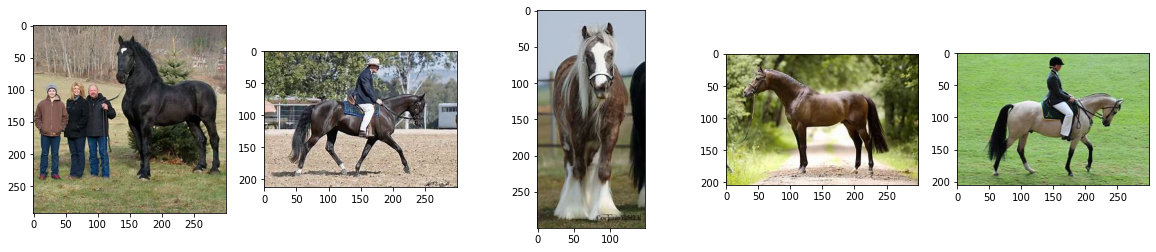

cat


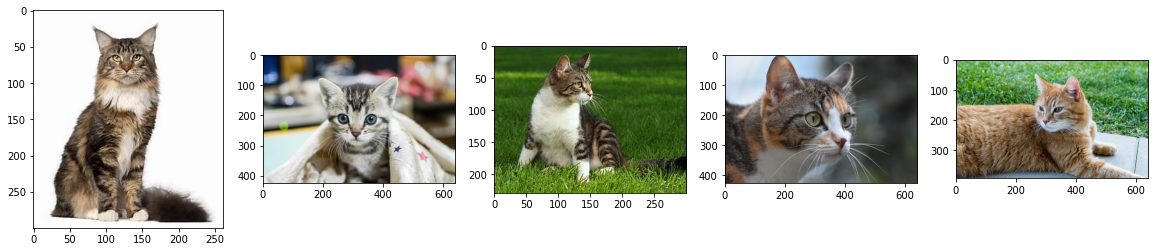

squirrel


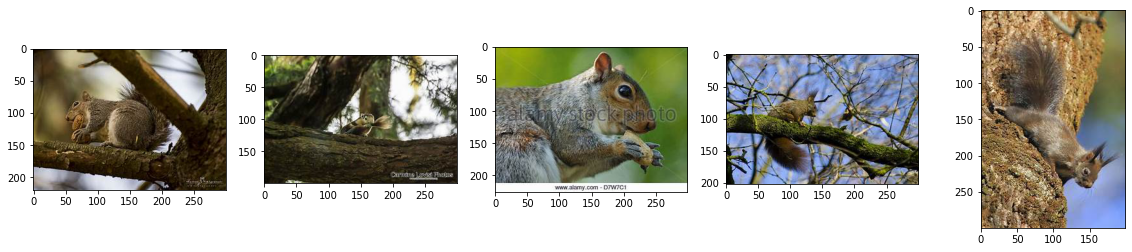

spider


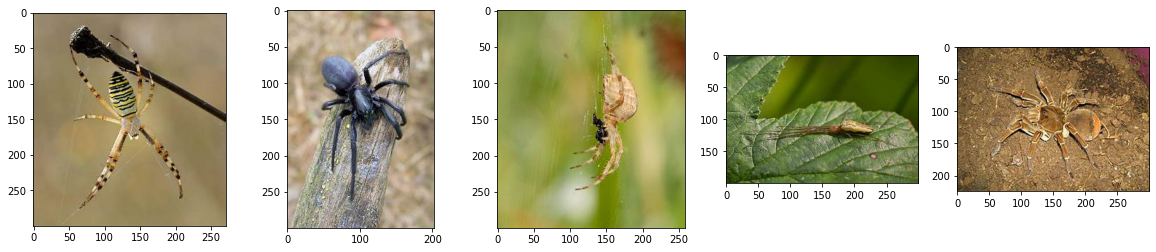

butterfly


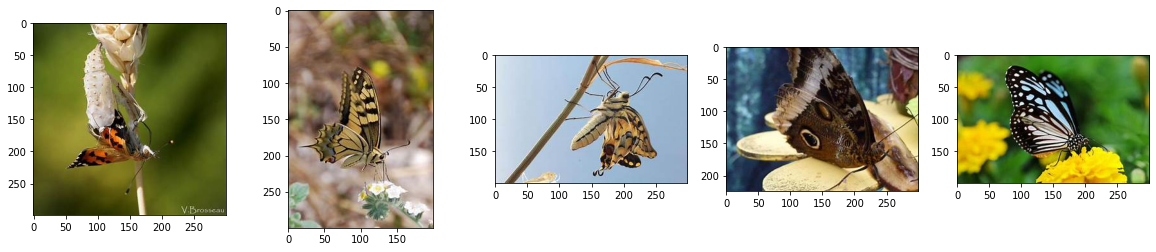

elephant


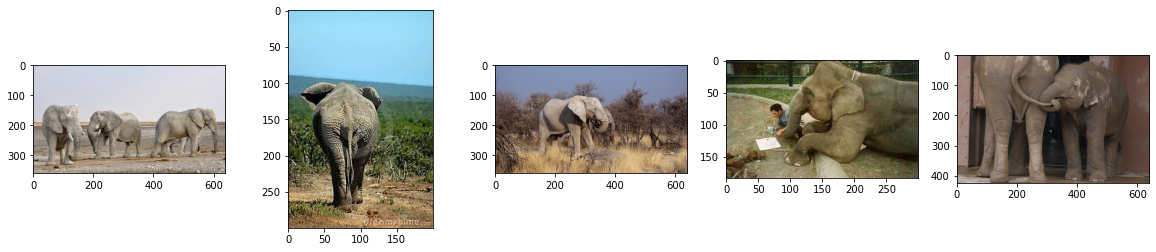

cow


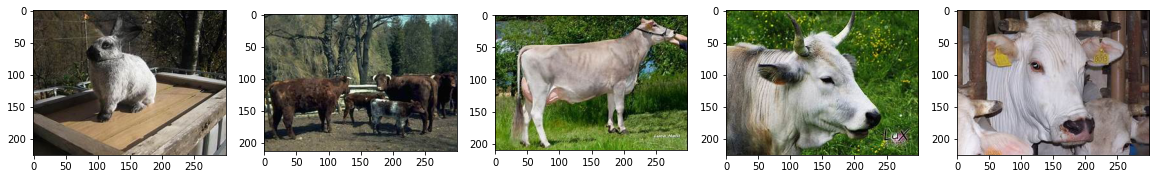

dog


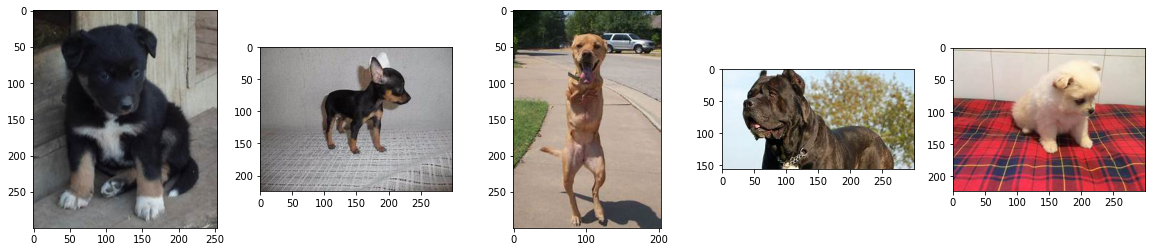

chicken


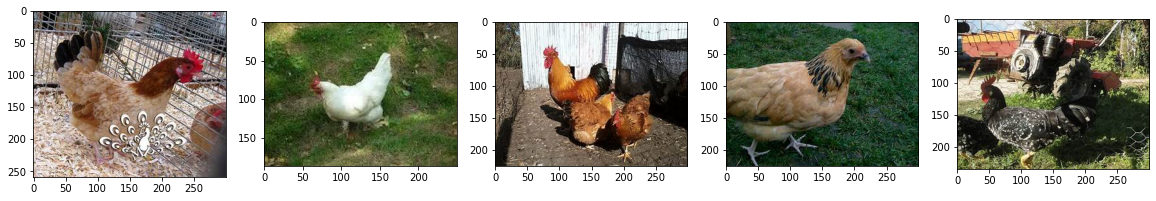

In [ ]:
# check images class
for  item in listdir_image:
  print(item)
  class_dir = os.path.join(dir_image,item)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

In [ ]:
# import library for Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D

In [ ]:
# make imagedatagenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [ ]:
batch_size = 512
train_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size =(150,150),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dir_image,
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset='validation'
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [ ]:
train_generator.class_indices

{'butterfly': 0,
 'cat': 1,
 'chicken': 2,
 'cow': 3,
 'dog': 4,
 'elephant': 5,
 'horse': 6,
 'sheep': 7,
 'spider': 8,
 'squirrel': 9}

In [ ]:
validation_generator.class_indices

{'butterfly': 0,
 'cat': 1,
 'chicken': 2,
 'cow': 3,
 'dog': 4,
 'elephant': 5,
 'horse': 6,
 'sheep': 7,
 'spider': 8,
 'squirrel': 9}

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')  
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 7s 0us/step


In [ ]:
# from tensorflow.keras.layers import Input
# from keras.applications import VGG19

# model = tf.keras.models.Sequential([
#     VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),
#     # tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Flatten(), 
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')  
# ])
# model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 5, 5, 2048)        58331648  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               26214912  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 84,680,458
Trainable params: 26,348,810
Non-trainable params: 58,331,648
___________________________________

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'RMSprop',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 95%!")
callbacks = myCallback()

In [ ]:
# fitting model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    callbacks=[callbacks],
    verbose = 1
)

Epoch 1/50
40/40 [==============================] - 307s 7s/step - loss: 35.8478 - accuracy: 0.4777 - val_loss: 1.6117 - val_accuracy: 0.7219
Epoch 2/50
40/40 [==============================] - 254s 6s/step - loss: 1.8672 - accuracy: 0.7091 - val_loss: 1.2286 - val_accuracy: 0.7609
Epoch 3/50
40/40 [==============================] - 252s 6s/step - loss: 0.9390 - accuracy: 0.7719 - val_loss: 0.5433 - val_accuracy: 0.8322
Epoch 4/50
40/40 [==============================] - 250s 6s/step - loss: 0.6340 - accuracy: 0.8143 - val_loss: 0.5902 - val_accuracy: 0.8191
Epoch 5/50
40/40 [==============================] - 249s 6s/step - loss: 0.6249 - accuracy: 0.8059 - val_loss: 0.5106 - val_accuracy: 0.8434
Epoch 6/50
40/40 [==============================] - 254s 6s/step - loss: 0.5913 - accuracy: 0.8197 - val_loss: 0.5688 - val_accuracy: 0.8250
Epoch 7/50
40/40 [==============================] - 256s 6s/step - loss: 0.5548 - accuracy: 0.8295 - val_loss: 0.4859 - val_accuracy: 0.8502
Epoch 8/50
4

In [ ]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(validation_generator)

print('Accuracy (train): ', score_train[1])
print('Accuracy: (test)', score_valid[1])

11/11 [==============================] - 52s 4s/step - loss: 0.4680 - accuracy: 0.8773
Accuracy (train):  0.9128753542900085
Accuracy: (test) 0.877293586730957


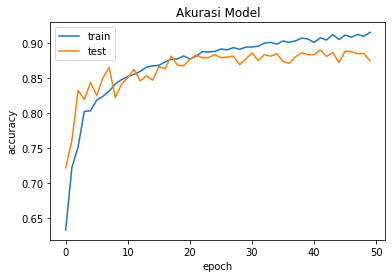

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

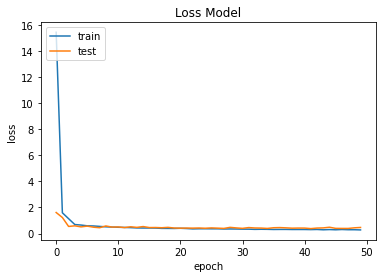

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Safe Model to TF Lite

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmprbragy2o/assets


In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.pb') 
%cd

INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets


/root
